# Building a simple linear regression model using PyTorch

## Steps
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training Loop
 - forward pass: computing prediction and loss
 - backward pass: gradients
 - update weights

In [1]:
# importing basic dependencies
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# steps: 
0. Prepare Data


In [2]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
# numpy array --> tensor data (float type)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))


In [5]:
x.shape,y.shape

(torch.Size([100, 1]), torch.Size([100]))

In [6]:
# changing y as column form 100*1
y = y.view(y.shape[0],1) # [0]--> 100 , 1 --> no of columns.

In [7]:
y.shape

torch.Size([100, 1])

In [8]:
n_samples, n_features = x.shape

# 1. Model

In [10]:
# Model building.
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

# 2. Loss and Optimizers

In [11]:
# loss function
criterion = nn.MSELoss()
learning_rate = 0.01
# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# 3.Training Loop

1. Forward Pass
2. Backward Pass
3. Update weights

In [32]:
n_iters = 100
x_test = torch.tensor(4.,dtype=torch.float32)
for epoch in range(n_iters):
    # forward pass
    y_pred = model(x)
    # loss
    l = criterion(y_pred,y)
    # backward pass
    l.backward()
    # update the weights.
    optimizer.step()
    # stopping gradient accumulation: otw it will accumulate in .grad data.
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch: {epoch+1}, w={w[0][0]},l={l.item():.5f}')
  


epoch: 1, w=24.144067764282227,l=3109.32666
epoch: 11, w=32.71372985839844,l=2348.36694
epoch: 21, w=40.017948150634766,l=1797.14050
epoch: 31, w=46.24480056762695,l=1397.44861
epoch: 41, w=51.55418014526367,l=1107.37073
epoch: 51, w=56.08208084106445,l=896.66882
epoch: 61, w=59.944183349609375,l=743.50482
epoch: 71, w=63.23892593383789,l=632.08740
epoch: 81, w=66.05010223388672,l=550.98511
epoch: 91, w=68.44904327392578,l=491.91406


# plot

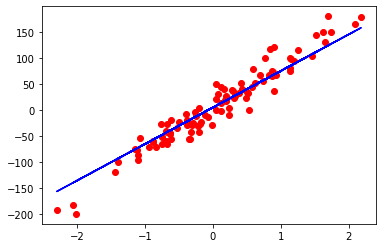

In [33]:
# now we don't want the gradient-item to be true.
predicted = model(x).detach()
predicted = predicted.numpy() # converted to numpy
plt.plot(x_numpy,y_numpy,'ro') # original dataset
plt.plot(x_numpy,predicted,'b') # vs predicted
plt.show()


# Logistic Regression

## 0. Dataset preparation

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
bc = datasets.load_breast_cancer()

In [50]:
x,y = bc.data,bc.target

In [51]:
n_samples,n_features = x.shape

In [54]:
n_samples,n_features

(569, 30)

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

In [59]:
# scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [60]:
# converting numpy to torch tensors.
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [63]:
y_train.shape 
# it has to be converted to column vector

torch.Size([455])

In [70]:
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

In [71]:
y_train.shape,y_test.shape

(torch.Size([455, 1]), torch.Size([114, 1]))

# 1. Model building

In [88]:
# f = wx + b, sigmoid activation function at end
# n_features = 30 
class LogisticRegression(nn.Module):
    def __init__(self,n_input_features):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(n_input_features,1)
    
    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegression(n_features)

# 3.Loss and optimizer

In [89]:
#### classification problem with binary output.(0/1)
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# 4.Training Loop

In [90]:
num_epochs = 100
for epoch in range(num_epochs):
    
    #forward prop
    y_pred = model(x_train)
    
    #loss
    loss = criterion(y_pred,y_train)
    
    #backward
    loss.backward()
    
    #updates weight
    optimizer.step()
    
    #zero gradient
    optimizer.zero_grad()
    
    if (epoch+1)%6 == 0:
        print(f'epoch: {epoch+1},loss={loss.item():.4f}' )

epoch: 6,loss=0.7673
epoch: 12,loss=0.6417
epoch: 18,loss=0.5545
epoch: 24,loss=0.4922
epoch: 30,loss=0.4458
epoch: 36,loss=0.4099
epoch: 42,loss=0.3812
epoch: 48,loss=0.3577
epoch: 54,loss=0.3379
epoch: 60,loss=0.3212
epoch: 66,loss=0.3066
epoch: 72,loss=0.2939
epoch: 78,loss=0.2827
epoch: 84,loss=0.2727
epoch: 90,loss=0.2637
epoch: 96,loss=0.2555


# Model evaluation

In [91]:
# Evaluation should not be the part of history of the computaion like the gradients calculated.
## So
with torch.no_grad():
    y_pred = model(x_test)
    pred_class = y_pred.round()
    acc = pred_class.eq(y_test).sum()/float(y_test.shape[0]) 
    print(f'accuracy: {acc:.4f}')

accuracy: 0.9035


# Simply We can see the accuracy using confusion matrix

In [94]:
#confusion matrix:
from sklearn.metrics import confusion_matrix
# Convert predicted probabilities to binary labels
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

In [95]:
cm

array([[36,  9],
       [ 2, 67]], dtype=int64)